<a href="https://colab.research.google.com/github/cgurkan/fake-news/blob/main/FakeNews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt 
import seaborn as sns
import math

BASE_URL = "/content/drive/MyDrive/Colab Notebooks/fakenews/"

In [2]:
df_train = pd.read_csv(BASE_URL+"data/train/Task3_english_training.csv")
df_train.head()

,public_id,text,title,our rating
0,5a228e0e,Distracted driving causes more deaths in Canad...,"You Can Be Fined $1,500 If Your Passenger Is U...",FALSE
1,30c605a1,Missouri politicians have made statements afte...,Missouri lawmakers condemn Las Vegas shooting,partially false
2,c3dea290,Home Alone 2: Lost in New York is full of viol...,CBC Cuts Donald Trump's 'Home Alone 2' Cameo O...,partially false
3,f14e8eb6,But things took a turn for the worse when riot...,Obama’s Daughters Caught on Camera Burning US ...,FALSE
4,faf024d6,It’s no secret that Epstein and Schiff share a...,Leaked Visitor Logs Reveal Schiff’s 78 Visits ...,FALSE


In [3]:
df_test = pd.read_csv(BASE_URL+"data/test/English_data_test_release_with_rating.csv")
df_test.head()

,ID,text,title,our rating
0,122653045997905671927713471889615536378,The deputy secretary at the US Treasury has sa...,US Treasury deputy sec warns that shortages li...,Partially false
1,275389285957305997321446227088442471741,KABUL—Approximately twelve minutes after U.S. ...,CNN Praises Taliban For Wearing Masks During A...,Other
2,333248764296609831067233855420575814716,The vast majority of (oblivious) Americans hav...,Tennessee Has Just LEGALIZED Government COVID ...,false
3,264019763253447756851916399533799891538,(Natural News) There’s a secret layer of infor...,MEDICAL SHOCKER: Scientists at Sloan Kettering...,false
4,158073737187690682830899773280916034317,"A recent study reported by the NCBI, which is ...",Study Results: Facemasks are Ineffective to Bl...,false


In [7]:
print(f"Training Data Shape: {df_train.shape}\nTest Data Shape: {df_test.shape}")

Training Data Shape: (900, 4)
Test Data Shape: (612, 4)


In [12]:
df_train.describe()

,text,title,label
count,900,884,900
unique,883,870,4
top,False Postulates#Neither the rate nor the magn...,- The Washington Post,FALSE
freq,3,3,465


In [15]:
df_test.describe()

,text,title,label
count,612,612,612
unique,612,531,5
top,The deputy secretary at the US Treasury has sa...,EXCLUSIVE: Per the CDC There Are Nearly Twice ...,false
freq,1,3,314


In [ ]:
#Drop public_id column bot train and test dataset
df_train.drop(labels='public_id', axis=1, inplace=True)
df_test.drop(labels='ID', axis=1, inplace=True)

In [17]:
#Rename target column to "label"
df_train.rename(columns={"our rating":"label"}, inplace=True)
df_test.rename(columns={"our rating":"label"}, inplace=True)

In [43]:
#Check for null values in training
df_train.isnull().sum()

text          0
title         0
label         0
label_name    0
dtype: int64

In [27]:
#Check the null values in column "title" 
df_train[df_train["title"].isnull()]

,text,title,label,label_name
483,Full Text of SB0042 100th General Assembly Jul...,NaN,2,Partially False
510,HON. STEFAN I. MYCHAJLIW ERIE COUNTY COMPTROLL...,NaN,2,Partially False
533,False Postulates#Neither the rate nor the magn...,NaN,2,Partially False
555,"Elisa Granato, the first volunteer who availed...",NaN,0,False
565,Regulation promotes self-sufficiency and immig...,NaN,0,False
590,"In the last year, the Reserve Bank of India bo...",NaN,0,False
591,PRIMARY school kids donned masks and had their...,NaN,1,True
608,The primary school population in England has c...,NaN,2,Partially False
690,People tired of tough decade had hopes for the...,NaN,2,Partially False
742,Historians may look to 2015 as the year when s...,NaN,3,Other


In [42]:
#Check for null values in training
df_test.isnull().sum()

text          0
title         0
label         0
label_name    0
dtype: int64

In [29]:
#Label column distribution in training data
df_train.groupby('label').count()

,text,title,label_name
label,,,
0,465,461,465
1,142,138,142
2,217,211,217
3,76,74,76


In [30]:
#Label column distribution in test data
df_test.groupby('label').count()

,text,title,label_name
label,,,
0,315,315,315
1,210,210,210
2,56,56,56
3,31,31,31


In [22]:
df_train['label'] = df_train.label.map({'TRUE': 1, 'True':1, 'FALSE': 0, 'false':0, 'partially false': 2, 'Partially false': 2, 'other': 3, 'Other': 3})
df_train["label_name"] = df_train.label.map({0: 'False', 1:'True', 2:'Partially False',  3:'Other'})

In [23]:
df_test['label'] = df_test.label.map({'TRUE': 1, 'True':1, 'FALSE': 0, 'false':0, 'partially false': 2, 'Partially false': 2, 'other': 3, 'Other': 3})
df_test["label_name"] = df_test.label.map({0:'False', 1:'True', 2:'Partially False',  3:'Other'})

In [31]:
df_train

,text,title,label,label_name
0,Distracted driving causes more deaths in Canad...,"You Can Be Fined $1,500 If Your Passenger Is U...",0,False
1,Missouri politicians have made statements afte...,Missouri lawmakers condemn Las Vegas shooting,2,Partially False
2,Home Alone 2: Lost in New York is full of viol...,CBC Cuts Donald Trump's 'Home Alone 2' Cameo O...,2,Partially False
3,But things took a turn for the worse when riot...,Obama’s Daughters Caught on Camera Burning US ...,0,False
4,It’s no secret that Epstein and Schiff share a...,Leaked Visitor Logs Reveal Schiff’s 78 Visits ...,0,False
...,...,...,...,...
895,Increased atmospheric carbon dioxide has helpe...,NHS fails thousands of new mothers with post-n...,3,Other
896,Boris Johnson has vowed to bring forward measu...,Boris Johnson vows to compensate for 'SNP inad...,2,Partially False
897,The number of children being considered for ad...,Nothing On This Earth Will Make President Buha...,1,True
898,Rep. Leon Young figures the Wisconsin Legislat...,NaN,0,False


Text(0.5, 1.0, 'Distribution of Target Label')

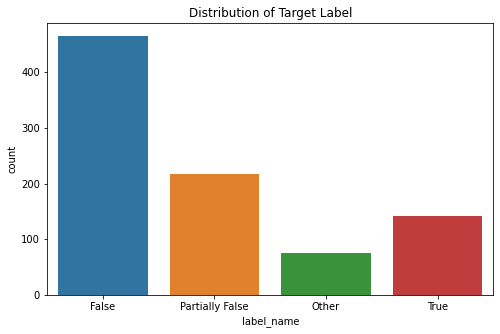

In [38]:
#df_train.groupby(["label_name"]).size().plot.bar()
plt.figure(figsize = (8,5))
sns.countplot(x = df_train['label_name'])
plt.title('Distribution of Target Label')

<Axes: xlabel='label_name'>

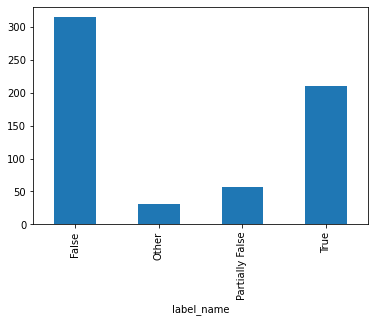

In [36]:
df_test.groupby(["label_name"]).size().plot.bar()

In [44]:
#clear NaN values with space, we don't use title
df_train['title'] = df_train['title'].replace(math.nan,' ')
df_test['title'] = df_test['title'].replace(math.nan,' ')

#df_train.isnull().sum()
#df_test.isnull().sum()

#concatenate text and title columns
df_train["news"] = df_train["title"] + ' ' + df_train["text"]
df_test["news"] = df_test["title"] + ' ' + df_test["text"]

In [49]:
df_train['num_words'] = df_train['news'].apply(lambda x:len(x.split()))

<ipython-input-91-97fbb079453e>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_train['num_words'], bins = range(1, 3000, 50), palette = 'Set1', alpha = 0.8)


Text(0.5, 1.0, 'Distribution of the Words count')

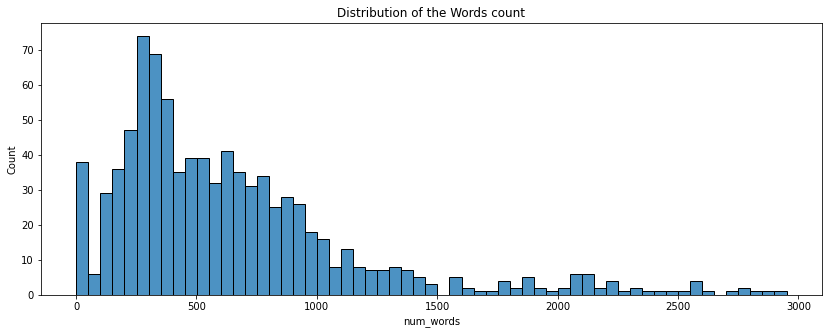

In [91]:
plt.figure(figsize = (14,5))
sns.histplot(df_train['num_words'], bins = range(1, 3000, 50), palette = 'Set1', alpha = 0.8)
plt.title('Distribution of the Words count')

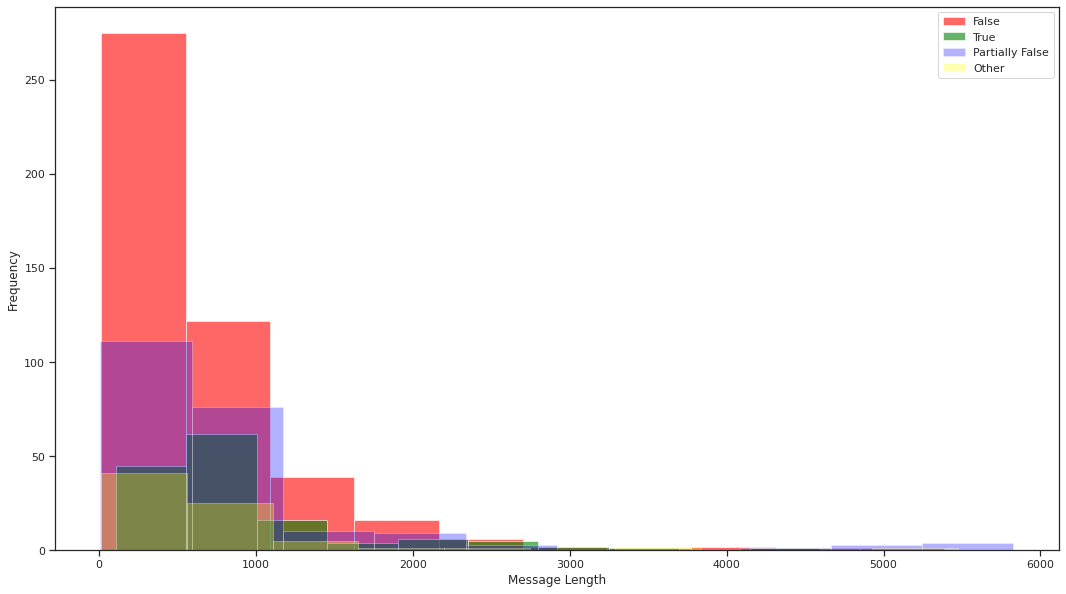

In [136]:
plt.figure(figsize=(18, 10))
df_train[df_train.label == 0].num_words.plot(kind='hist', color='red',  label='False', alpha=0.6),
df_train[df_train.label == 1].num_words.plot(kind='hist', color='green', label='True', alpha=0.6)
df_train[df_train.label == 2].num_words.plot(kind='hist', color='blue', label='Partially False', alpha=0.3),
df_train[df_train.label == 3].num_words.plot(kind='hist', color='yellow', label='Other', alpha=0.3)
plt.legend()
plt.xlabel("Message Length")
plt.show()

Text(0.5, 0, 'Message Length')

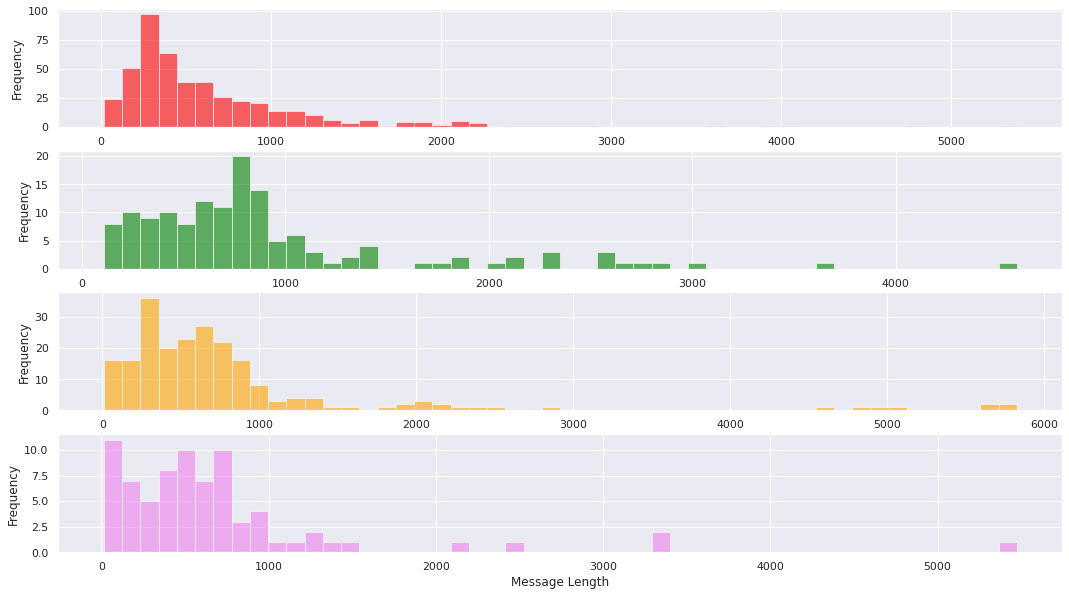

In [171]:
fig, axs = plt.subplots(4, 1,figsize=(18, 10))
df_train[df_train.label == 0].num_words.plot(bins=50, kind='hist', color='red',  label='False', alpha=0.6, ax=axs[0]),
df_train[df_train.label == 1].num_words.plot(bins=50, kind='hist', color='green', label='True', alpha=0.6, ax=axs[1])
df_train[df_train.label == 2].num_words.plot(bins=50, kind='hist', color='orange', label='Partially False', alpha=0.6, ax=axs[2]),
df_train[df_train.label == 3].num_words.plot(bins=50, kind='hist', color='violet', label='Other', alpha=0.6, ax=axs[3])
plt.xlabel("Message Length")

<Axes: xlabel='num_words', ylabel='Count'>

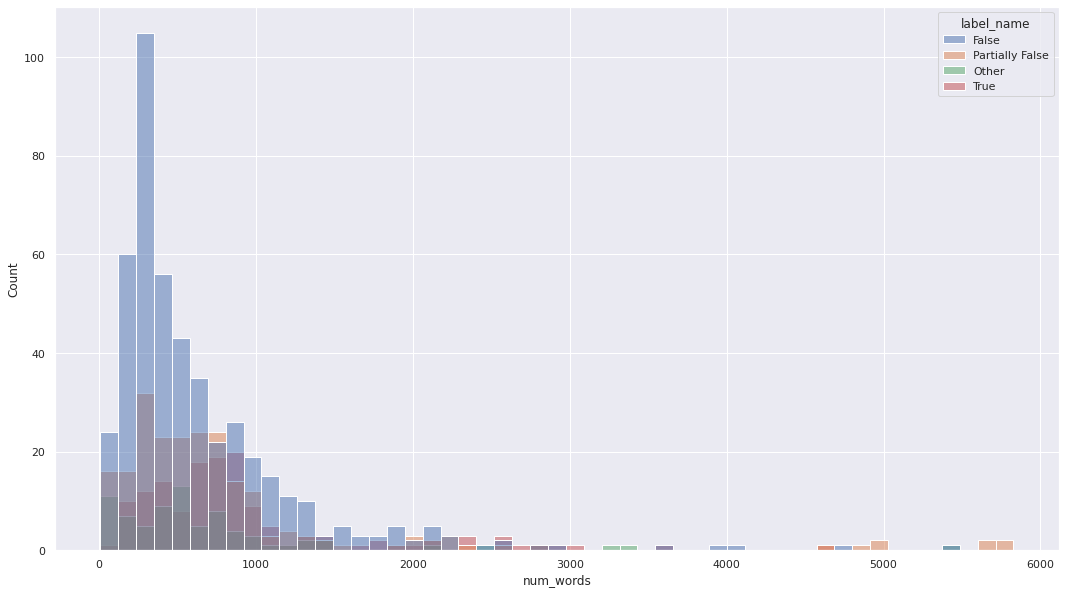

In [173]:
plt.figure(figsize=(18, 10))
sns.histplot(df_train, x="num_words", hue="label_name")

In [74]:
df['num_words'] = df['text'].apply(lambda x: len(x.split()))
df['words'] = df['text'].apply(lambda x: x.split())

<ipython-input-73-78622db766a1>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['num_words'], bins = range(1, 3000, 50), palette = 'Set1', alpha = 0.8)


Text(0.5, 1.0, 'Distribution of the News Words count')

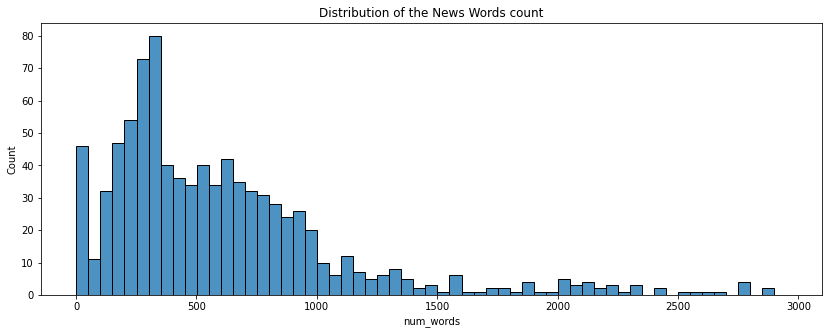

In [73]:
plt.figure(figsize = (14,5))
sns.histplot(df['num_words'], bins = range(1, 3000, 50), palette = 'Set1', alpha = 0.8)
plt.title('Distribution of the Words count')

In [23]:
words= list(df["text"].values)

In [ ]:
import nltk
#nltk.download()

from nltk.tokenize import word_tokenize 


In [51]:
all_words = []
for x in df["text"][0:25]:
  all_words +=  word_tokenize(x)

In [53]:
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
tk = RegexpTokenizer('\s+', gaps = True)
text_data = [] # List for storing the tokenized data
for x in df["text"][0:25]:    
  tokenized_data = tk.tokenize(x) # Tokenize the news
  text_data.append(tokenized_data) # append the tokenized data

In [ ]:
text_data

In [55]:
 # Extract the stopwords
sw = stopwords.words('english')
clean_data = [] # List for storing the clean text
# Remove the stopwords using stopwords
for data in text_data:
  clean_text = [words.lower() for words in data if words.lower() not in sw]
  clean_data.append(clean_text) # Appned the clean_text in the clean_data list

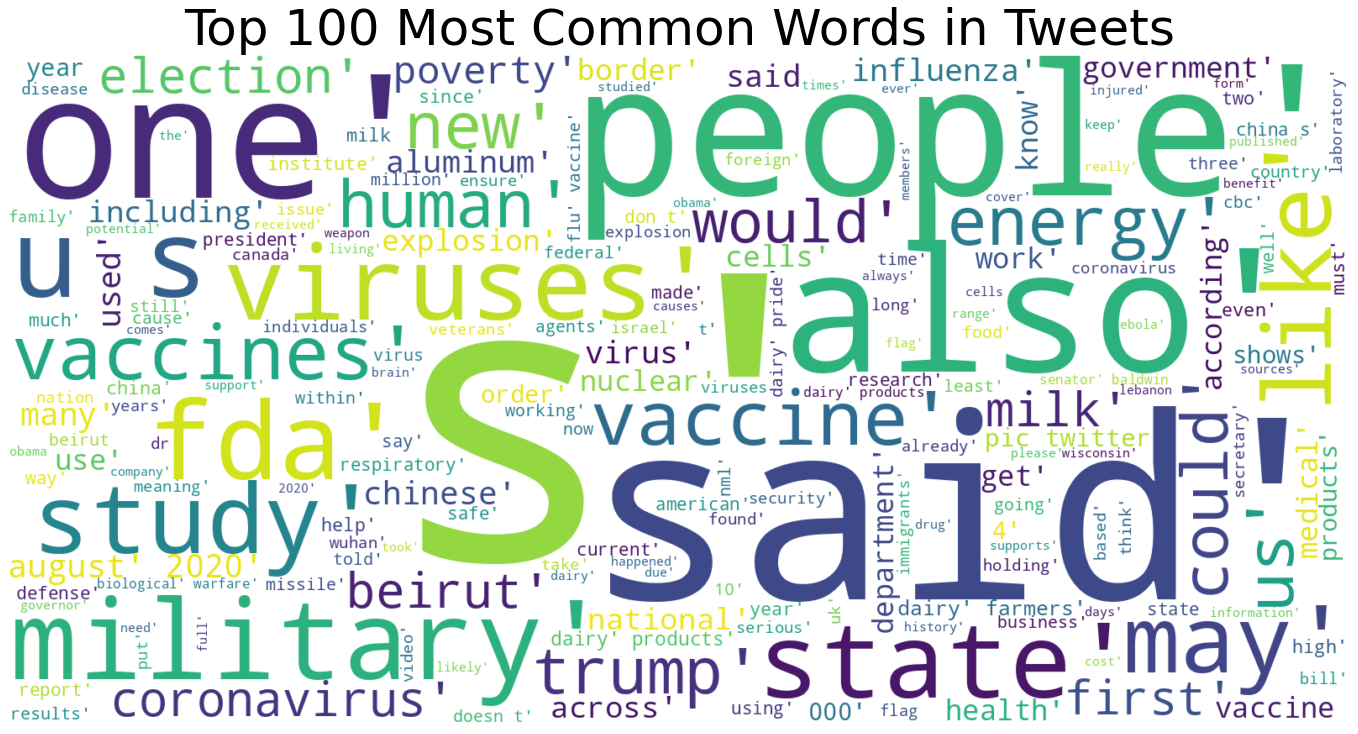

In [56]:

wordcloud = WordCloud(width=1600, height=800, background_color='white', stopwords=STOPWORDS).generate(str(clean_data))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words in Tweets', fontsize=50)
plt.tight_layout(pad=0)
plt.show()